In [1]:
#imports 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Comparação entre notificações de sífilis adquirida e em gestantes e variáveis do PMAQ
Neste notebook são unidos os quantitativos de casos de
sífilis adquirida e em gestantes e respostas do PMAQ, agrupados pelo *código IBGE*.
Isso é feito para poder unir os dados das duas bases.

In [2]:
pmaq_df = pd.read_csv('../data/pmaq_ibge.csv', index_col=[0, 1], header=[0,1])
pmaq_df

VAR               I.11.1           I.15.9.3                  I.15.9.4        \
CODE                   1    2 9997        1     2   998 9997        1     2   
           IBGE                                                               
CNES_FINAL 110001    3.0  0.0  0.0      0.0   0.0   3.0  0.0      0.0   0.0   
           110002   10.0  0.0  0.0     10.0   0.0   0.0  0.0      9.0   1.0   
           110003    0.0  2.0  0.0      0.0   0.0   2.0  0.0      0.0   0.0   
           110004    8.0  0.0  0.0      1.0   7.0   0.0  0.0      1.0   7.0   
           110005    3.0  0.0  0.0      0.0   0.0   3.0  0.0      0.0   0.0   
...                  ...  ...  ...      ...   ...   ...  ...      ...   ...   
           522200    5.0  0.0  0.0      3.0   2.0   0.0  0.0      0.0   5.0   
           522205    2.0  1.0  0.0      2.0   1.0   0.0  0.0      2.0   1.0   
           522220    2.0  0.0  0.0      1.0   0.0   1.0  0.0      0.0   1.0   
           522230    2.0  0.0  0.0      0.0   0.0   2.0  0.0      0.0   0.0   
           530010   66.0  4.0  4.0     38.0  16.0  16.0  4.0     15.0  39.0   

VAR                      ... II.15.2           II.15.13            III.13.7.3  \
CODE                998  ...       2  998 9997        1     2 9997          1   
           IBGE          ...                                                    
CNES_FINAL 110001   3.0  ...     1.0  0.0  0.0      3.0   2.0  0.0        7.0   
           110002   0.0  ...     0.0  0.0  0.0     16.0   0.0  0.0       19.0   
           110003   2.0  ...     0.0  0.0  0.0      0.0   2.0  0.0        2.0   
           110004   0.0  ...     0.0  0.0  1.0      6.0  11.0  1.0       28.0   
           110005   3.0  ...     0.0  0.0  0.0      0.0   3.0  0.0        4.0   
...                 ...  ...     ...  ...  ...      ...   ...  ...        ...   
           522200   0.0  ...     0.0  0.0  0.0      5.0   0.0  0.0        0.0   
           522205   0.0  ...     0.0  0.0  0.0      3.0   0.0  0.0        3.0   
           522220   1.0  ...     0.0  0.0  0.0      1.0   1.0  0.0        1.0   
           522230   2.0  ...     1.0  0.0  0.0      2.0   0.0  0.0        0.0   
           530010  16.0  ...    16.0  0.0  9.0    118.0  10.0  9.0      108.0   

VAR                                  
CODE                 2    998  9997  
           IBGE                      
CNES_FINAL 110001  0.0   13.0   0.0  
           110002  1.0   42.0   2.0  
           110003  0.0    3.0   3.0  
           110004  0.0   35.0   9.0  
           110005  1.0    6.0   1.0  
...                ...    ...   ...  
           522200  0.0   20.0   0.0  
           522205  0.0    9.0   0.0  
           522220  0.0    7.0   0.0  
           522230  0.0    8.0   0.0  
           530010  2.0  418.0  15.0  

[3990 rows x 25 columns]

In [3]:
adquirida_df = pd.read_csv('../data/adquirida.csv', sep=';', parse_dates=['dt_notific'])
adquirida_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316785 entries, 0 to 316784
Data columns (total 34 columns):
Unnamed: 0    316785 non-null int64
dt_notific    316785 non-null datetime64[ns]
sem_not       316785 non-null float64
nu_ano        316785 non-null float64
anodiag       316785 non-null float64
sg_uf_not     316785 non-null float64
id_municip    316785 non-null float64
id_regiona    316785 non-null float64
id_unidade    316785 non-null float64
UFRES         316785 non-null float64
id_mn_resi    316785 non-null float64
dt_diag       316785 non-null object
sem_pri       316785 non-null float64
nu_idade_n    316785 non-null float64
FXETARIA      316785 non-null float64
SEXO          316785 non-null float64
cs_gestant    316785 non-null float64
cs_raca       316785 non-null float64
cs_escol_n    316785 non-null float64
cs_zona       316785 non-null float64
dt_invest     225868 non-null object
classi_fin    316785 non-null float64
criterio      316785 non-null float64
tpautocto   

### Ajustando as datas
Primeiro, filtramos os diagnosticos que foram dados entre o terceiro ciclo. Depois criamos a nova coluna que guarda mês/ano do diagnóstico.

In [4]:
adq_ciclo3_df = adquirida_df.query("'2016-08-01' < dt_notific < '2018-01-22'")

In [5]:
adq_agrup_df = adquirida_df.groupby('id_municip')['Unnamed: 0'].count()

In [6]:
pmaq_df1 = pmaq_df.copy()
pmaq_df1.index = pmaq_df.index.droplevel()

pmaq_df1

VAR    I.11.1           I.15.9.3                  I.15.9.4              ...  \
CODE        1    2 9997        1     2   998 9997        1     2   998  ...   
IBGE                                                                    ...   
110001    3.0  0.0  0.0      0.0   0.0   3.0  0.0      0.0   0.0   3.0  ...   
110002   10.0  0.0  0.0     10.0   0.0   0.0  0.0      9.0   1.0   0.0  ...   
110003    0.0  2.0  0.0      0.0   0.0   2.0  0.0      0.0   0.0   2.0  ...   
110004    8.0  0.0  0.0      1.0   7.0   0.0  0.0      1.0   7.0   0.0  ...   
110005    3.0  0.0  0.0      0.0   0.0   3.0  0.0      0.0   0.0   3.0  ...   
...       ...  ...  ...      ...   ...   ...  ...      ...   ...   ...  ...   
522200    5.0  0.0  0.0      3.0   2.0   0.0  0.0      0.0   5.0   0.0  ...   
522205    2.0  1.0  0.0      2.0   1.0   0.0  0.0      2.0   1.0   0.0  ...   
522220    2.0  0.0  0.0      1.0   0.0   1.0  0.0      0.0   1.0   1.0  ...   
522230    2.0  0.0  0.0      0.0   0.0   2.0  0.0      0.0   0.0   2.0  ...   
530010   66.0  4.0  4.0     38.0  16.0  16.0  4.0     15.0  39.0  16.0  ...   

VAR    II.15.2           II.15.13            III.13.7.3                    
CODE         2  998 9997        1     2 9997          1    2    998  9997  
IBGE                                                                       
110001     1.0  0.0  0.0      3.0   2.0  0.0        7.0  0.0   13.0   0.0  
110002     0.0  0.0  0.0     16.0   0.0  0.0       19.0  1.0   42.0   2.0  
110003     0.0  0.0  0.0      0.0   2.0  0.0        2.0  0.0    3.0   3.0  
110004     0.0  0.0  1.0      6.0  11.0  1.0       28.0  0.0   35.0   9.0  
110005     0.0  0.0  0.0      0.0   3.0  0.0        4.0  1.0    6.0   1.0  
...        ...  ...  ...      ...   ...  ...        ...  ...    ...   ...  
522200     0.0  0.0  0.0      5.0   0.0  0.0        0.0  0.0   20.0   0.0  
522205     0.0  0.0  0.0      3.0   0.0  0.0        3.0  0.0    9.0   0.0  
522220     0.0  0.0  0.0      1.0   1.0  0.0        1.0  0.0    7.0   0.0  
522230     1.0  0.0  0.0      2.0   0.0  0.0        0.0  0.0    8.0   0.0  
530010    16.0  0.0  9.0    118.0  10.0  9.0      108.0  2.0  418.0  15.0  

[3990 rows x 25 columns]

In [7]:
pmaq_df1['adquirida'] = adq_agrup_df.fillna(0)

pmaq_df1

VAR    I.11.1           I.15.9.3                  I.15.9.4              ...  \
CODE        1    2 9997        1     2   998 9997        1     2   998  ...   
IBGE                                                                    ...   
110001    3.0  0.0  0.0      0.0   0.0   3.0  0.0      0.0   0.0   3.0  ...   
110002   10.0  0.0  0.0     10.0   0.0   0.0  0.0      9.0   1.0   0.0  ...   
110003    0.0  2.0  0.0      0.0   0.0   2.0  0.0      0.0   0.0   2.0  ...   
110004    8.0  0.0  0.0      1.0   7.0   0.0  0.0      1.0   7.0   0.0  ...   
110005    3.0  0.0  0.0      0.0   0.0   3.0  0.0      0.0   0.0   3.0  ...   
...       ...  ...  ...      ...   ...   ...  ...      ...   ...   ...  ...   
522200    5.0  0.0  0.0      3.0   2.0   0.0  0.0      0.0   5.0   0.0  ...   
522205    2.0  1.0  0.0      2.0   1.0   0.0  0.0      2.0   1.0   0.0  ...   
522220    2.0  0.0  0.0      1.0   0.0   1.0  0.0      0.0   1.0   1.0  ...   
522230    2.0  0.0  0.0      0.0   0.0   2.0  0.0      0.0   0.0   2.0  ...   
530010   66.0  4.0  4.0     38.0  16.0  16.0  4.0     15.0  39.0  16.0  ...   

VAR    II.15.2      II.15.13            III.13.7.3                   adquirida  
CODE       998 9997        1     2 9997          1    2    998  9997            
IBGE                                                                            
110001     0.0  0.0      3.0   2.0  0.0        7.0  0.0   13.0   0.0      14.0  
110002     0.0  0.0     16.0   0.0  0.0       19.0  1.0   42.0   2.0     130.0  
110003     0.0  0.0      0.0   2.0  0.0        2.0  0.0    3.0   3.0       NaN  
110004     0.0  1.0      6.0  11.0  1.0       28.0  0.0   35.0   9.0     354.0  
110005     0.0  0.0      0.0   3.0  0.0        4.0  1.0    6.0   1.0      10.0  
...        ...  ...      ...   ...  ...        ...  ...    ...   ...       ...  
522200     0.0  0.0      5.0   0.0  0.0        0.0  0.0   20.0   0.0      12.0  
522205     0.0  0.0      3.0   0.0  0.0        3.0  0.0    9.0   0.0       1.0  
522220     0.0  0.0      1.0   1.0  0.0        1.0  0.0    7.0   0.0       9.0  
522230     0.0  0.0      2.0   0.0  0.0        0.0  0.0    8.0   0.0       NaN  
530010     0.0  9.0    118.0  10.0  9.0      108.0  2.0  418.0  15.0    2952.0  

[3990 rows x 26 columns]

In [26]:
#salvando csv
pmaq_df1.to_csv('../data/pmaq_agrupado.csv')

### Correlação

In [9]:
pmaq_df1.corr()

VAR                I.11.1                      I.15.9.3                      \
CODE                    1         2      9997         1         2       998   
VAR        CODE                                                               
I.11.1     1     1.000000  0.030083  0.341918  0.800241  0.428163  0.116152   
           2     0.030083  1.000000  0.229715  0.149038  0.464900  0.490907   
           9997  0.341918  0.229715  1.000000  0.359388  0.135748  0.182104   
I.15.9.3   1     0.800241  0.149038  0.359388  1.000000  0.121128 -0.089376   
           2     0.428163  0.464900  0.135748  0.121128  1.000000 -0.005760   
           998   0.116152  0.490907  0.182104 -0.089376 -0.005760  1.000000   
           9997  0.341918  0.229715  1.000000  0.359388  0.135748  0.182104   
I.15.9.4   1     0.477414  0.172894  0.241938  0.673179  0.062349 -0.065812   
           2     0.808923  0.366061  0.317130  0.718514  0.723446 -0.058923   
           998   0.116152  0.490907  0.182104 -0.089376 -0.005760  1.000000   
           9997  0.341918  0.229715  1.000000  0.359388  0.135748  0.182104   
II.12.1.7  1     0.785883  0.363327  0.336377  0.795161  0.348097  0.220728   
           2     0.127535  0.123169  0.018654  0.075147  0.158062  0.083529   
           9997  0.270851  0.114448  0.746464  0.334752  0.057269  0.036292   
II.15.2    1     0.784454  0.344303  0.312316  0.797425  0.341749  0.198031   
           2     0.265913  0.340587  0.436373  0.199683  0.217202  0.343281   
           998  -0.022352  0.144882 -0.003273 -0.042830  0.052199  0.146465   
           9997  0.270851  0.114448  0.746464  0.334752  0.057269  0.036292   
II.15.13   1     0.759452  0.236459  0.297772  0.825958  0.237466  0.093055   
           2     0.252419  0.540756  0.202718  0.039918  0.483352  0.513266   
           9997  0.270851  0.114448  0.746464  0.334752  0.057269  0.036292   
III.13.7.3 1     0.759521  0.325897  0.298222  0.736931  0.362765  0.203022   
           2     0.394367  0.411636  0.203126  0.399251  0.313167  0.228434   
           998   0.778990  0.311640  0.303337  0.785889  0.328029  0.182730   
           9997  0.306311  0.270157  0.759719  0.367287  0.122498  0.165863   
adquirida        0.657213  0.189790  0.311979  0.722505  0.177940  0.061236   

VAR                        I.15.9.4                      ...   II.15.2  \
CODE                 9997         1         2       998  ...       998   
VAR        CODE                                          ...             
I.11.1     1     0.341918  0.477414  0.808923  0.116152  ... -0.022352   
           2     0.229715  0.172894  0.366061  0.490907  ...  0.144882   
           9997  1.000000  0.241938  0.317130  0.182104  ... -0.003273   
I.15.9.3   1     0.359388  0.673179  0.718514 -0.089376  ... -0.042830   
           2     0.135748  0.062349  0.723446 -0.005760  ...  0.052199   
           998   0.182104 -0.065812 -0.058923  1.000000  ...  0.146465   
           9997  1.000000  0.241938  0.317130  0.182104  ... -0.003273   
I.15.9.4   1     0.241938  1.000000  0.271997 -0.065812  ... -0.018291   
           2     0.317130  0.271997  1.000000 -0.058923  ...  0.002039   
           998   0.182104 -0.065812 -0.058923  1.000000  ...  0.146465   
           9997  1.000000  0.241938  0.317130  0.182104  ... -0.003273   
II.12.1.7  1     0.336377  0.450166  0.763219  0.220728  ...  0.022367   
           2     0.018654  0.026811  0.157821  0.083529  ...  0.670255   
           9997  0.746464  0.300803  0.223687  0.036292  ...  0.003190   
II.15.2    1     0.312316  0.450423  0.761078  0.198031  ...  0.004247   
           2     0.436373  0.117399  0.272981  0.343281  ...  0.063951   
           998  -0.003273 -0.018291  0.002039  0.146465  ...  1.000000   
           9997  0.746464  0.300803  0.223687  0.036292  ...  0.003190   
II.15.13   1     0.297772  0.463889  0.714850  0.093055  ... -0.012581   
           2     0.202718  0.034150  0.331701  0.513266  ...  0.212938   
      

O que nos interessa é a corelação de notificações com as respostas do PMAQ, que respondem questões sobre teste rápido e applicação de benzetacil penicilina.

In [10]:
# pmaq_df1.corr().loc['adquirida', :'adquirida']

In [11]:
pmaq_df1.corr().iloc[-1:, :-1]

VAR               I.11.1                     I.15.9.3                     \
CODE                   1        2      9997         1        2       998   
VAR       CODE                                                             
adquirida       0.657213  0.18979  0.311979  0.722505  0.17794  0.061236   

VAR                       I.15.9.4                      ...   II.15.2  \
CODE                9997         1         2       998  ...         2   
VAR       CODE                                          ...             
adquirida       0.311979  0.409676  0.610547  0.061236  ...  0.221153   

VAR                                 II.15.13                     III.13.7.3  \
CODE                 998      9997         1         2      9997          1   
VAR       CODE                                                                
adquirida       0.012254  0.386899  0.902957  0.099472  0.386899   0.832117   

VAR                                           
CODE                   2       998      9997  
VAR       CODE                                
adquirida       0.446862  0.893492  0.374074  

[1 rows x 25 columns]

## Gestante

In [12]:
gestante_df = pd.read_csv('../data/gestante.csv', sep=';', parse_dates=['dt_notific'])
gestante_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195218 entries, 0 to 195217
Data columns (total 17 columns):
Unnamed: 0    195218 non-null int64
dt_notific    195218 non-null datetime64[ns]
nu_ano        195218 non-null int64
sg_uf_not     195218 non-null int64
id_municip    195218 non-null int64
dt_diag       195218 non-null object
cs_gestant    195218 non-null int64
cs_raca       195218 non-null int64
cs_escol_n    195218 non-null int64
cs_zona       195218 non-null int64
id_pais       195218 non-null int64
CLASSCLIN     195218 non-null int64
tpteste1      195218 non-null int64
tpconfirma    195218 non-null int64
ESQ_TRAT      195218 non-null int64
tratparc      195218 non-null int64
tpmotparc     195218 non-null int64
dtypes: datetime64[ns](1), int64(15), object(1)
memory usage: 25.3+ MB


In [13]:
ges_ciclo3_df = gestante_df.query("'2016-08-01' < dt_notific < '2018-01-22'")
ges_agrup_df = gestante_df.groupby('id_municip')['Unnamed: 0'].count()

In [14]:
ges_ciclo3_df.head()

,Unnamed: 0,dt_notific,nu_ano,sg_uf_not,id_municip,dt_diag,cs_gestant,cs_raca,cs_escol_n,cs_zona,id_pais,CLASSCLIN,tpteste1,tpconfirma,ESQ_TRAT,tratparc,tpmotparc
6,6,2016-12-08,2016,43,430240,5/5/2005,1,1,3,1,1,1,1,1,1,9,9
139,139,2016-11-09,2016,13,130260,11/9/2006,2,4,6,1,1,1,1,1,1,9,9
1508,1508,2017-03-21,2017,21,211130,3/20/2007,1,4,6,1,1,4,1,1,1,9,9
24199,24199,2017-03-17,2017,43,432300,3/17/2010,2,1,99,1,1,9,1,1,1,9,9
26528,26528,2016-08-29,2016,33,330455,6/14/2010,1,2,5,1,1,1,1,1,1,9,9


In [15]:
pmaq_df1['gestante'] = ges_agrup_df.fillna(0)

pmaq_df1

VAR    I.11.1           I.15.9.3                  I.15.9.4              ...  \
CODE        1    2 9997        1     2   998 9997        1     2   998  ...   
IBGE                                                                    ...   
110001    3.0  0.0  0.0      0.0   0.0   3.0  0.0      0.0   0.0   3.0  ...   
110002   10.0  0.0  0.0     10.0   0.0   0.0  0.0      9.0   1.0   0.0  ...   
110003    0.0  2.0  0.0      0.0   0.0   2.0  0.0      0.0   0.0   2.0  ...   
110004    8.0  0.0  0.0      1.0   7.0   0.0  0.0      1.0   7.0   0.0  ...   
110005    3.0  0.0  0.0      0.0   0.0   3.0  0.0      0.0   0.0   3.0  ...   
...       ...  ...  ...      ...   ...   ...  ...      ...   ...   ...  ...   
522200    5.0  0.0  0.0      3.0   2.0   0.0  0.0      0.0   5.0   0.0  ...   
522205    2.0  1.0  0.0      2.0   1.0   0.0  0.0      2.0   1.0   0.0  ...   
522220    2.0  0.0  0.0      1.0   0.0   1.0  0.0      0.0   1.0   1.0  ...   
522230    2.0  0.0  0.0      0.0   0.0   2.0  0.0      0.0   0.0   2.0  ...   
530010   66.0  4.0  4.0     38.0  16.0  16.0  4.0     15.0  39.0  16.0  ...   

VAR    II.15.2 II.15.13            III.13.7.3                   adquirida  \
CODE      9997        1     2 9997          1    2    998  9997             
IBGE                                                                        
110001     0.0      3.0   2.0  0.0        7.0  0.0   13.0   0.0      14.0   
110002     0.0     16.0   0.0  0.0       19.0  1.0   42.0   2.0     130.0   
110003     0.0      0.0   2.0  0.0        2.0  0.0    3.0   3.0       NaN   
110004     1.0      6.0  11.0  1.0       28.0  0.0   35.0   9.0     354.0   
110005     0.0      0.0   3.0  0.0        4.0  1.0    6.0   1.0      10.0   
...        ...      ...   ...  ...        ...  ...    ...   ...       ...   
522200     0.0      5.0   0.0  0.0        0.0  0.0   20.0   0.0      12.0   
522205     0.0      3.0   0.0  0.0        3.0  0.0    9.0   0.0       1.0   
522220     0.0      1.0   1.0  0.0        1.0  0.0    7.0   0.0       9.0   
522230     0.0      2.0   0.0  0.0        0.0  0.0    8.0   0.0       NaN   
530010     9.0    118.0  10.0  9.0      108.0  2.0  418.0  15.0    2952.0   

VAR    gestante  
CODE             
IBGE             
110001      7.0  
110002     50.0  
110003      3.0  
110004     93.0  
110005     10.0  
...         ...  
522200     19.0  
522205      9.0  
522220      5.0  
522230      2.0  
530010   1728.0  

[3990 rows x 27 columns]

## Congênita

In [16]:
congenita_df = pd.read_csv('../data/congenita.csv', sep=';', parse_dates=['DT_NOT'])
congenita_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125102 entries, 0 to 125101
Data columns (total 16 columns):
Unnamed: 0    125102 non-null int64
DT_DIAG       125102 non-null int64
DT_NOT        125102 non-null object
DT_NASC       125102 non-null int64
RACA          125102 non-null int64
ANODIAG       125102 non-null int64
ANONOT        125102 non-null int64
SEXO          125102 non-null int64
ESQTT_MAE     125102 non-null int64
DIAG_FINAL    125102 non-null int64
PRE_NATAL     125102 non-null int64
PARCTRAT      125102 non-null int64
ESC_MAE       125102 non-null int64
MOM_DIAG      125102 non-null int64
ID_MAE        125102 non-null int64
MUNRES        125102 non-null int64
dtypes: int64(15), object(1)
memory usage: 15.3+ MB


In [17]:
con_ciclo3_df = congenita_df.query("'2016-08-01' < DT_NOT < '2018-01-22'")
con_agrup_df = congenita_df.groupby('MUNRES')['Unnamed: 0'].count()

In [18]:
#pmaq_df1 = pd.concat([ pmaq_df1, con_agrup_df.rename('congenita')], axis =1).fillna(0)
pmaq_df1['congenita'] = con_agrup_df

pmaq_df1

VAR    I.11.1           I.15.9.3                  I.15.9.4              ...  \
CODE        1    2 9997        1     2   998 9997        1     2   998  ...   
IBGE                                                                    ...   
110001    3.0  0.0  0.0      0.0   0.0   3.0  0.0      0.0   0.0   3.0  ...   
110002   10.0  0.0  0.0     10.0   0.0   0.0  0.0      9.0   1.0   0.0  ...   
110003    0.0  2.0  0.0      0.0   0.0   2.0  0.0      0.0   0.0   2.0  ...   
110004    8.0  0.0  0.0      1.0   7.0   0.0  0.0      1.0   7.0   0.0  ...   
110005    3.0  0.0  0.0      0.0   0.0   3.0  0.0      0.0   0.0   3.0  ...   
...       ...  ...  ...      ...   ...   ...  ...      ...   ...   ...  ...   
522200    5.0  0.0  0.0      3.0   2.0   0.0  0.0      0.0   5.0   0.0  ...   
522205    2.0  1.0  0.0      2.0   1.0   0.0  0.0      2.0   1.0   0.0  ...   
522220    2.0  0.0  0.0      1.0   0.0   1.0  0.0      0.0   1.0   1.0  ...   
522230    2.0  0.0  0.0      0.0   0.0   2.0  0.0      0.0   0.0   2.0  ...   
530010   66.0  4.0  4.0     38.0  16.0  16.0  4.0     15.0  39.0  16.0  ...   

VAR    II.15.13            III.13.7.3                   adquirida gestante  \
CODE          1     2 9997          1    2    998  9997                      
IBGE                                                                         
110001      3.0   2.0  0.0        7.0  0.0   13.0   0.0      14.0      7.0   
110002     16.0   0.0  0.0       19.0  1.0   42.0   2.0     130.0     50.0   
110003      0.0   2.0  0.0        2.0  0.0    3.0   3.0       NaN      3.0   
110004      6.0  11.0  1.0       28.0  0.0   35.0   9.0     354.0     93.0   
110005      0.0   3.0  0.0        4.0  1.0    6.0   1.0      10.0     10.0   
...         ...   ...  ...        ...  ...    ...   ...       ...      ...   
522200      5.0   0.0  0.0        0.0  0.0   20.0   0.0      12.0     19.0   
522205      3.0   0.0  0.0        3.0  0.0    9.0   0.0       1.0      9.0   
522220      1.0   1.0  0.0        1.0  0.0    7.0   0.0       9.0      5.0   
522230      2.0   0.0  0.0        0.0  0.0    8.0   0.0       NaN      2.0   
530010    118.0  10.0  9.0      108.0  2.0  418.0  15.0    2952.0   1728.0   

VAR    congenita  
CODE              
IBGE              
110001       NaN  
110002      15.0  
110003       NaN  
110004      20.0  
110005       1.0  
...          ...  
522200       2.0  
522205       3.0  
522220       NaN  
522230       NaN  
530010    1442.0  

[3990 rows x 28 columns]

In [19]:
# já que a função corr() ignora Nan, vamos excluir antes
pmaq_df1.loc[:, ['adquirida', 'gestante', 'congenita']] = pmaq_df1[['adquirida', 'gestante', 'congenita']]
pmaq_df1.dropna(inplace=True)

In [20]:
pmaq_df1.corr().iloc[-3:, :-3]

VAR               I.11.1                      I.15.9.3                      \
CODE                   1         2      9997         1         2       998   
VAR       CODE                                                               
adquirida       0.665029  0.185401  0.308901  0.726314  0.170102  0.054331   
gestante        0.653637  0.192464  0.255260  0.682822  0.212308  0.064422   
congenita       0.614337  0.192651  0.430815  0.643647  0.182895  0.092390   

VAR                       I.15.9.4                      ...   II.15.2  \
CODE                9997         1         2       998  ...         2   
VAR       CODE                                          ...             
adquirida       0.308901  0.407607  0.614694  0.054331  ...  0.217136   
gestante        0.255260  0.333028  0.630108  0.064422  ...  0.244310   
congenita       0.430815  0.329300  0.577195  0.092390  ...  0.350216   

VAR                                 II.15.13                     III.13.7.3  \
CODE                 998      9997         1         2      9997          1   
VAR       CODE                                                                
adquirida       0.018622  0.385550  0.904154  0.090694  0.385550   0.835741   
gestante        0.028560  0.272432  0.912076  0.104238  0.272432   0.871397   
congenita       0.023888  0.500810  0.814005  0.196859  0.500810   0.792412   

VAR                                           
CODE                   2       998      9997  
VAR       CODE                                
adquirida       0.454030  0.895472  0.371057  
gestante        0.422505  0.898483  0.288008  
congenita       0.381779  0.806230  0.530151  

[3 rows x 25 columns]

In [21]:
pmaq_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1800 entries, 110002 to 530010
Data columns (total 28 columns):
(I.11.1, 1)           1800 non-null float64
(I.11.1, 2)           1800 non-null float64
(I.11.1, 9997)        1800 non-null float64
(I.15.9.3, 1)         1800 non-null float64
(I.15.9.3, 2)         1800 non-null float64
(I.15.9.3, 998)       1800 non-null float64
(I.15.9.3, 9997)      1800 non-null float64
(I.15.9.4, 1)         1800 non-null float64
(I.15.9.4, 2)         1800 non-null float64
(I.15.9.4, 998)       1800 non-null float64
(I.15.9.4, 9997)      1800 non-null float64
(II.12.1.7, 1)        1800 non-null float64
(II.12.1.7, 2)        1800 non-null float64
(II.12.1.7, 9997)     1800 non-null float64
(II.15.2, 1)          1800 non-null float64
(II.15.2, 2)          1800 non-null float64
(II.15.2, 998)        1800 non-null float64
(II.15.2, 9997)       1800 non-null float64
(II.15.13, 1)         1800 non-null float64
(II.15.13, 2)         1800 non-null float64
(II.15

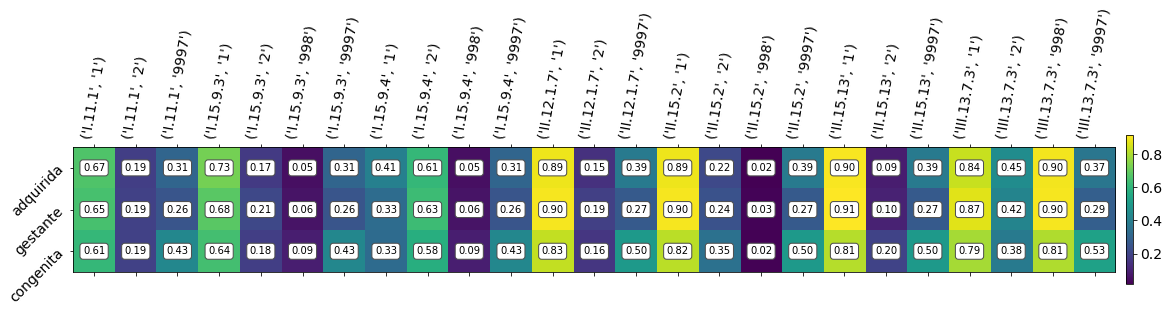

In [22]:
cormat = pmaq_df1.corr().iloc[-3:, :-3]


f = plt.figure(figsize=(19, 15))
plt.matshow(cormat, fignum=f.number)
plt.xticks(range(cormat.shape[1]), cormat.columns, fontsize=14, rotation=80)
plt.yticks(range(3), ['adquirida', 'gestante', 'congenita'], fontsize=14, rotation=45)
for (i, j), z in np.ndenumerate(cormat):
    plt.text(j, i, '{:0.2f}'.format(z), ha='center', va='center',
            bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))


cb = plt.colorbar(fraction=0.007, pad=0.01)
cb.ax.tick_params(labelsize=14)

from datetime import datetime
temp = datetime.now()
plt.savefig('../reports/fig-{}.png'.format(temp))

### OBS
Variável II.15.2 - Equipe recebe o exame VDRL das gestantes do território em tempo oportuno para intervenções necessárias

In [23]:
print(len(adquirida_df.id_municip.unique()))
print(len(gestante_df.id_municip.unique()))
print(len(congenita_df.MUNRES.unique()))

print(len(adq_ciclo3_df.id_municip.unique()))
print(len(ges_ciclo3_df.id_municip.unique()))
print(len(con_ciclo3_df.MUNRES.unique()))

3564
4414
3873
2603
2850
22


### Comparando casos por estado

In [24]:
# Recupera codigo IBGE do estado
def first_two(d):                
     return int(str(d)[:2])

congenita_df['uf'] = congenita_df.MUNRES.apply(first_two)
res = adquirida_df.sg_uf_not.astype(int).value_counts() + gestante_df.sg_uf_not.value_counts() + congenita_df.uf.value_counts()

In [25]:
res.sort_values(ascending=False)

35    198898.0
33     69003.0
43     57805.0
31     41839.0
41     30101.0
29     27885.0
42     22889.0
26     21813.0
32     21534.0
23     19272.0
15     17286.0
50     15926.0
52     12554.0
13     12238.0
28      9764.0
21      9078.0
24      7415.0
51      6166.0
27      6164.0
53      6122.0
25      5696.0
17      4496.0
22      3871.0
11      2981.0
12      2547.0
16      2423.0
14      1338.0
9          NaN
dtype: float64